<a href="https://colab.research.google.com/github/vinayparjapati5/Text-Summarization-Project/blob/main/Text_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Text Summarization using LSTM

In [2]:
!pip install mealpy
import nltk
from nltk.corpus import stopwords
import csv
from nltk.tag import pos_tag # for proper noun
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import pandas as pd
import math
import numpy as np
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import roc_curve, roc_auc_score,auc
nltk.download('stopwords')
from mealpy.swarm_based.GWO import OriginalGWO
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten,LSTM

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.3/386.3 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 38.2 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
stop_words = set(stopwords.words('english'))

def preprocess(doc):
  doc = doc.replace('@', 'at')
  doc = doc.replace('\'', ' ')
  doc = doc.replace(',', ' ')
  doc = doc.replace('$', 'dollar')
  lst = []
  for token in doc.split():
    if token.lower() not in stop_words:
      lst.append(token)
  return ' '.join(lst)


In [4]:
# Sample text summarization dataset

data = pd.read_excel("/content/Data.xlsx")

# Create a DataFrame from the dataset
df = pd.DataFrame(data)

# Encode labels
label_encoder = LabelEncoder()
df['label_encoded'] = label_encoder.fit_transform(df['Label'])

# Pre-processing the sentences
df['Sentences'] = df['Sentences'].apply(preprocess)

# Split the data into features and labels
X = df['Sentences']
y = df['label_encoded']

# Tokenize and pad sequences
max_words = 1000  # Define the maximum number of words to consider
max_sequence_length = 100  # Define the maximum sequence length

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)
X = pad_sequences(sequences, maxlen=max_sequence_length)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape

(551, 100)

With Embedding layer

In [5]:
model = Sequential()
model.add(Embedding(input_dim=1000, output_dim=128, input_length=X_train.shape[1]))
model.add(LSTM(128))
model.add(Dense(1, activation='softmax'))



Without Embedding layer

In [ ]:
#model = Sequential()
#model.add(LSTM(128, input_shape=(X_train.shape[1], 1)))  # Note the input_shape
#model.add(Dense(1, activation='sigmoid'))


In [6]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=1, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}")

5/5 [==============================] - 0s 96ms/step - loss: 0.5314 - accuracy: 0.7681
Test loss: 0.5314, Test accuracy: 0.7681


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 128)          128000    
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 259713 (1014.50 KB)
Trainable params: 259713 (1014.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


5/5 [==============================] - 1s 37ms/step
ROC AUC: 0.46875


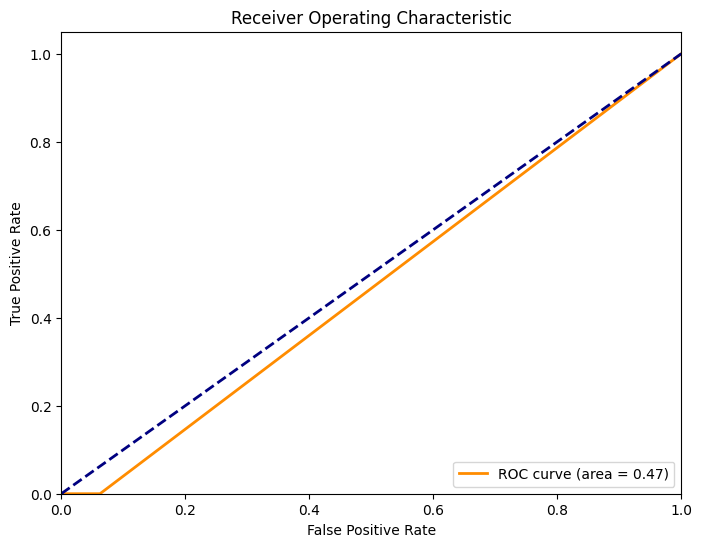

In [7]:
# Predict probabilities on the test data
y_pred_prob = model.predict(X_test)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

print("ROC AUC:", roc_auc)


# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()



In [9]:
# Convert predicted probabilities to binary predictions
y_pred_binary = (y_pred_prob > 0.5).astype(int)

# Generate predicted summary
predicted_summary = pd.DataFrame({'Text': tokenizer.sequences_to_texts(X_test),
                                  'True Label': y_test,
                                  'Predicted Label': y_pred_binary.flatten(),
                                  'Probability': y_pred_prob.flatten()})

print("Predicted Summary:")
print(predicted_summary)


Predicted Summary:
                                                  Text  True Label  \
286  mohfw covid 19 vaccine portal national clinica...           1   
655  trial figures provided two pfizer effective pi...           1   
257  mohfw central teams chhattisgarh uttar pradesh...           1   
336  prime minister high level meeting chief minist...           1   
318  ministry culture issues re opening art prevent...           1   
..                                                 ...         ...   
333  minister health called health make post covid ...           1   
506  potential virus areas body might help wide sym...           1   
24   china countries demonstrating spread virus slo...           1   
158  november panel present interim report world he...           0   
517  policy administration implement science based ...           0   

     Predicted Label  Probability  
286                1          1.0  
655                1          1.0  
257                1          1.